<a href="https://colab.research.google.com/github/RadhakrishnaMATTA/Cyclonedetection/blob/main/qrcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

face_cascade = cv2.CascadeClassifier('face_detector.xml')

img = cv2.imread('image.jpg')

faces = face_cascade.detectMultiScale(img, 1.1, 4)

for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
cv2.imwrite("face_detected.png", img)

print('Successfully saved')

error: OpenCV(4.10.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [2]:
import cv2

# Provide the full path to the face detection model if it is not in the current directory
face_cascade = cv2.CascadeClassifier('face_detector.xml')

# Provide the full path to the image file if it is not in the current directory
# And add error handling to check if the image is loaded correctly.
img = cv2.imread('image.jpg')

if img is None:
    print("Error: Could not load image. Check the file path and ensure the image is not corrupted.")
    exit()  # Or handle the error in a way that suits your application

faces = face_cascade.detectMultiScale(img, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

cv2.imwrite("face_detected.png", img)

print('Successfully saved')

Error: Could not load image. Check the file path and ensure the image is not corrupted.


error: OpenCV(4.10.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [1]:
!pip install pytube

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00


In [6]:
import pytube


link = input("enter the link ")

video = pytube.YouTube(link)

video.streams.first().download()
print("donload",link)

enter the link https://youtu.be/4jeXh-2uJ3Y?si=crNVItn_qwvCR0-c


HTTPError: HTTP Error 403: Forbidden

In [30]:
from pytube import YouTube

def download_youtube_video():
    try:
        # Get the YouTube video link from the user
        video_url = input("Enter YouTube video URL: ")

        # Create a YouTube object
        yt = YouTube(video_url)

        # Get the highest resolution stream
        video_stream = yt.streams.get_highest_resolution()

        # Download the video
        print(f"Downloading: {yt.title} ...")
        video_stream.download()  # Saves to the current directory

        print("✅ Download completed successfully!")

    except Exception as e:
        print("❌ Error:", e)

# Run the function
download_youtube_video()


Enter YouTube video URL: https://www.youtube.com/watch?v=tf1HWVQqCtM
❌ Error: HTTP Error 403: Forbidden


In [7]:
!pip install --upgrade pytube

In [11]:
!pip install pytube

import pytube
import time

link = input("Enter the link: ")

def download_video(link, retries=3, delay=5):
    """Downloads a YouTube video, handling potential errors with retries."""
    for attempt in range(retries):
        try:
            yt = pytube.YouTube(link, use_oauth=False, allow_oauth_cache=True)
            streams = yt.streams.filter(file_extension='mp4')

            if streams:
                stream = streams.get_highest_resolution() or streams.get_by_itag(22) or streams.first()
                if stream:
                    stream.download()
                    print(f"Downloaded: {link}")
                    return True  # Success
                else:
                    print("No suitable stream found for download.")
            else:
                print("No streams found for this video.")

        except pytube.exceptions.HTTPError as e:
            if e.response.status_code == 403:
                print(f"Attempt {attempt + 1}/{retries}: YouTube is blocking the request (HTTP 403 Forbidden).")
                print("Retrying in", delay, "seconds...")
                time.sleep(delay)  # Wait before retrying
            else:
                print(f"Attempt {attempt + 1}/{retries}: An HTTP error occurred: {e}")
                return False  # Failure
        except Exception as e:
            print(f"Attempt {attempt + 1}/{retries}: An unexpected error occurred: {e}")
            return False
    return False  # All retries failed

if download_video(link):
    print("Download successful!")
else:
    print("Download failed after multiple attempts.")

Enter the link: hi


AttributeError: module 'pytube.exceptions' has no attribute 'HTTPError'

In [12]:
!pip install qrcode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.8 MB/s eta 0:00:00


In [13]:
!pip install image

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 53.6 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=d9b8fbe7a9059c7482d1bb35f1a72d47e00d33ea10c22a2154fb2992a1db4ee6
  Stored in directory: /root/.cache/pip/wheels/62/40/4f/3c9a8d0f22a1a6f966975a460e5cb509a1e7dc42e2ce5d9a6d
Successfully built image


Enter the Data: hi
Enter the Box size (default=10): 7
name it as: 7
qr code generated and saved in the gallery


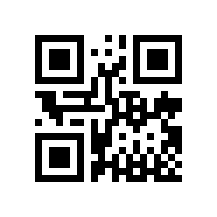

In [18]:
import qrcode
from IPython.display import Image

# Data to encode
data = input('Enter the Data: ')

# Get version and box size from user, but provide default values
# version = int(input('Enter the version (complexity) (1-40, default=None): ') or None)  # Default to None for automatic version selection
box_size = int(input('Enter the Box size (default=10): ') or 10)  # Default to 10

# Validate version if provided by user
# if version is not None and not 1 <= version <= 40:
#     print("Error: Version must be between 1 and 40.")
#     exit()

# Creating an instance of QRCode class
# Passing explicit error correction level
qr = qrcode.QRCode(
    version=None,  # Let the library determine the version automatically
    error_correction=qrcode.constants.ERROR_CORRECT_L,  # Use ERROR_CORRECT_L
    box_size=box_size,
    border=5,
)

# Adding data to the instance 'qr'
qr.add_data(data)

qr.make(fit=True)  # Let the library automatically determine the best version if not specified
img = qr.make_image(fill_color='black', back_color='white')

f = input("name it as: ")  # image name

img.save(f'{f}.png')

print('qr code generated and saved in the gallery')

# Display the image
display(Image(filename=f'{f}.png'))

Enter data type (video, pdf, link, text): hi
Enter text data: hi
QR code for text generated and saved as hi.png


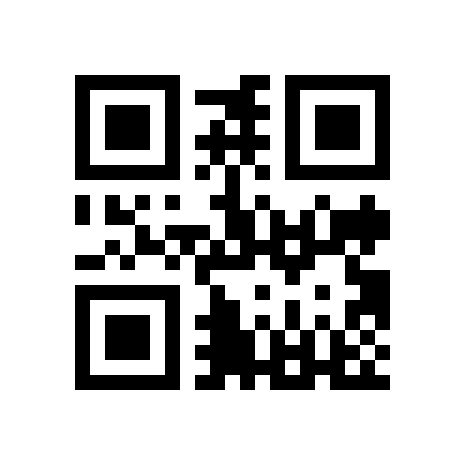

In [26]:
import qrcode
from IPython.display import Image

# Get data type from user
data_type = input("Enter data type (video, pdf, link, text): ").lower()

# Get data based on type
if data_type == "video":
    data = input("Enter YouTube video link: ")
elif data_type == "pdf":
    data = input("Enter PDF file path: ")
elif data_type == "link":
    data = input("Enter website link: ")
else:  # Default to text if invalid type
    data_type = "text"
    data = input("Enter text data: ")

# Creating an instance of QRCode class
qr = qrcode.QRCode(
    version=15,
    box_size=55,
    border=5,
)

# Adding data to the instance 'qr'
qr.add_data(data)
qr.make(fit=True)

# Generate and save the QR code image







img = qr.make_image(fill_color="white", back_color="black")  # Inverted colors
img.save(f"{f}_inverted.png")











print(f"QR code for {data_type} generated and saved as {f}.png")

# Display the image
display(Image(filename=f"{f}.png"))